In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### read dataset

In [2]:
data = pd.read_csv("TV_Sales.csv")

#### first five rows

In [3]:
data.head()

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181


#### last five rows

In [4]:
data.tail()

,TV,Sales
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411
4571,42.0,148.202414


#### sample from dataset

In [5]:
data.sample(4)

,TV,Sales
2145,27.0,93.618855
206,12.0,50.009210
2119,92.0,328.239378
3628,27.0,96.015125


#### shape of dataset in terms of rows & columns

In [6]:
data.shape

(4572, 2)

#### dtype of columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


#### percentage of null values

In [8]:
data.isnull().sum() * 100 / len(data)

TV       0.218723
Sales    0.131234
dtype: float64

In [9]:
data.TV.unique()

array([ 16.,  13.,  41.,  83.,  15.,  29.,  55.,  31.,  76.,  62.,  42.,
        64.,  nan,  34.,  36.,  60.,  25., 100.,  92.,  46.,  78.,  37.,
        99.,  75.,  54.,  27.,  21.,  40.,  67.,  90.,  12.,  81.,  43.,
        47.,  79.,  65.,  82.,  68.,  98.,  26.,  10.,  32.,  91.,  72.,
        49.,  14.,  20.,  17.,  52.,  84.,  70.,  77.,  56.,  18.,  22.,
        94.,  97.,  44.,  86.,  93.,  30.,  95.,  39.,  87.,  38.,  63.,
        24.,  74.,  85.,  33.,  88.,  59.,  61.,  51.,  73.,  58.,  69.,
        89.,  11.,  53.,  19.,  45.,  23.,  35.,  71.,  28.,  66.,  50.,
        48.,  96.,  80.,  57.])

In [13]:
data["TV"] = data["TV"].fillna(value = data.TV.median())

In [16]:
data.TV.isnull().sum()

0

In [20]:
data["Sales"] = data["Sales"].fillna(value = data.Sales.median())

In [21]:
data.Sales.isnull().sum()

0

In [22]:
data.isnull().sum() * 100 / len(data)

TV       0.0
Sales    0.0
dtype: float64

In [23]:
data.duplicated().sum()

0

In [24]:
data.shape

(4572, 2)

In [29]:
data.describe()

,TV,Sales
count,4572.000000,4572.000000
mean,54.064523,192.462356
std,26.096509,93.072021
min,10.000000,31.199409
25%,32.000000,112.397660
50%,53.000000,189.231172
75%,77.000000,272.414914
max,100.000000,364.079751


#### boxplot to find outlier

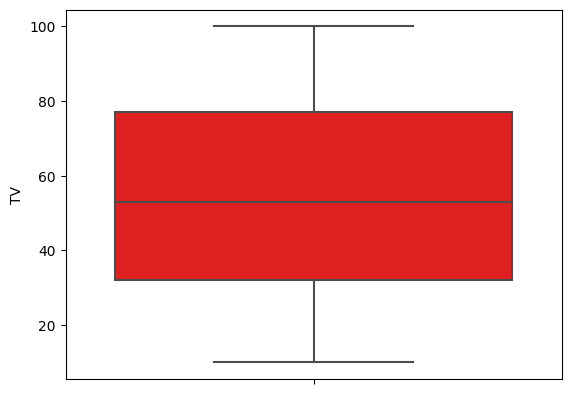

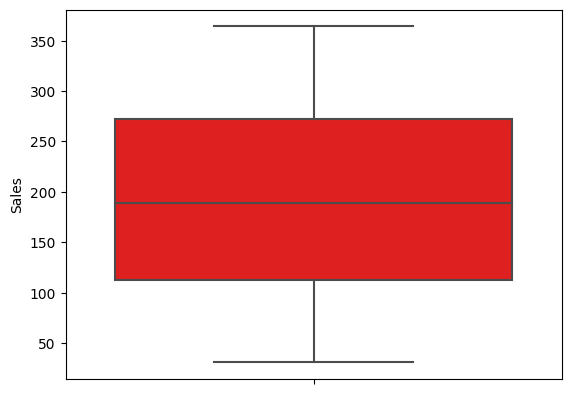

In [30]:
for i in data.columns:
    sns.boxplot(y = data[i], color = "red")
    plt.show();

#### assigning feature(independent variable) to variable "x"

In [31]:
x = data[["TV"]].values
x

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

#### assigning target variable to y

In [32]:
y = data[["Sales"]].values
y

array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

#### standard scalar

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

In [36]:
x = sc.fit_transform(x)
x

array([[-1.45876549],
       [-1.57373597],
       [-0.50067816],
       ...,
       [-0.38570769],
       [ 0.64902663],
       [-0.46235467]])

#### split data to training and testing set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [39]:
#shape of training and testing set

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3657, 1)
(915, 1)
(3657, 1)
(915, 1)


#### Linear Regresion model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
#fit linear regression to our training dataset

model.fit(x_train, y_train)

LinearRegression()

In [43]:
#coefficient of model, y = mx + c

model.coef_

array([[92.79193764]])

In [44]:
#intercept/slope of model, y = mx + c

model.intercept_

array([192.55116082])

In [48]:
#accuracy of model : training

train_accuracy = model.score(x_train, y_train) * 100
print("training accuracy be: ", train_accuracy)

training accuracy be:  99.29029792998794


In [49]:
#accuracy of model : testing

test_accuracy = model.score(x_test, y_test) * 100
print("testing accuracy be: ", test_accuracy)

testing accuracy be:  99.48008131619018


In [46]:
#target variable : predicted values

y_pred = model.predict(x)
y_pred

array([[ 57.18948418],
       [ 46.52115063],
       [146.0922638 ],
       ...,
       [156.76059736],
       [252.77559935],
       [149.64837499]])

#### r2_score, mean_squared_error, mean_absolute_error

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [51]:
R2_score = r2_score(y_test, model.predict(x_test)) * 100
print("r2 score be: ", R2_score)

r2 score be:  99.48008131619018


In [52]:
mse = mean_squared_error(y_test, model.predict(x_test))
print("mean squared error be: ", mse)

mean squared error be:  45.0201027262285


In [53]:
mae = mean_absolute_error(y_test, model.predict(x_test))
print("mean absolute error be: ", mae)

mean absolute error be:  2.6264449575130406


#### dataframe of Actual and Predicted

In [54]:
output = pd.DataFrame(zip(y, y_pred), columns = ("Actual", "Predicted"), dtype = float)
output

,Actual,Predicted
0,54.732757,57.189484
1,46.677897,46.521151
2,150.177829,146.092264
3,298.246340,295.448934
4,56.594181,53.633373
...,...,...
4567,94.685866,92.750596
4568,249.101915,252.775599
4569,163.631457,156.760597
4570,253.610411,252.775599


#### plotting of new dataframe "output"

#### 1. scatterplot

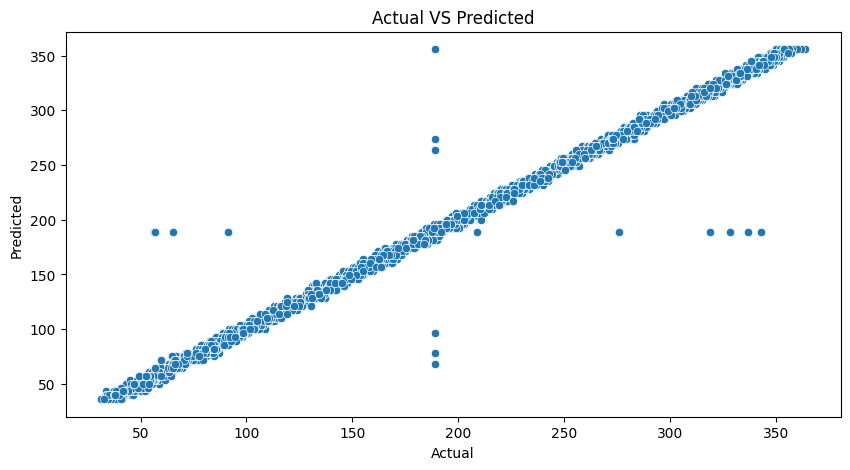

In [56]:
plt.figure(figsize = (10, 5))
plt.title("Actual VS Predicted")
sns.scatterplot(data = output, x ="Actual", y = "Predicted")
plt.show();

#### 2. lineplot

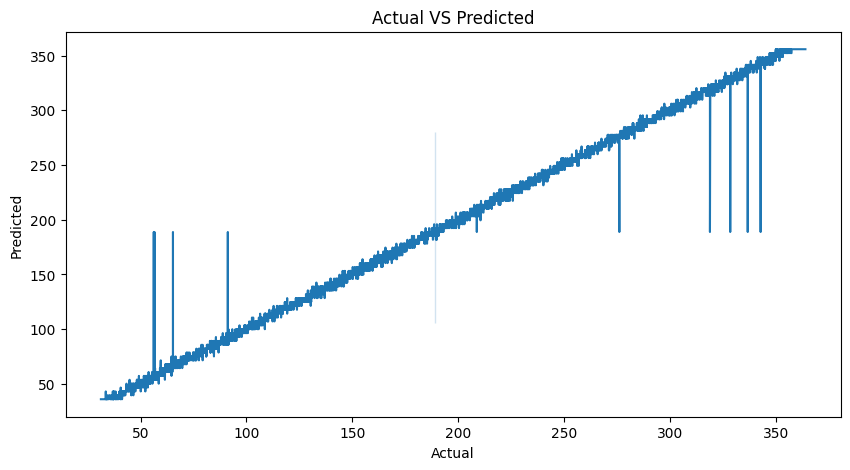

In [59]:
plt.figure(figsize = (10, 5))
plt.title("Actual VS Predicted")
sns.lineplot(data = output, x = "Actual", y = "Predicted")
plt.show();